In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Sales_add.csv')

In [3]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [5]:
from scipy import stats
data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [22]:
ttest,pval = stats.ttest_ind(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])
print("pval=",pval)
if pval<0.05:
    print("We reject null hypothesis. there is an increase in sales after stepping into digital marketing")
else:
    print("We accept null hypothesis. there is no increase in sales after stepping into digital marketing")

pval= 2.614368006904645e-16
We reject null hypothesis. there is an increase in sales after stepping into digital marketing


# ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

<AxesSubplot:xlabel='Region', ylabel='count'>

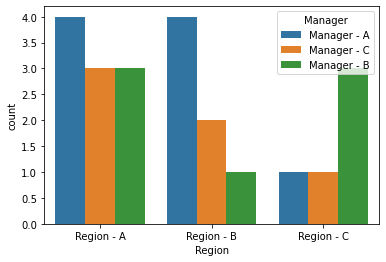

In [16]:
import seaborn as sns
sns.countplot(x=data['Region'],hue=data['Manager'])

In [53]:
mycross_table=pd.crosstab(data["Region"],data["Manager"])
print('Manager-Region CrossTable :-\n',mycross_table)
[chi_square_statistic,p_value,dof,Expected_Values]=stats.chi2_contingency(mycross_table)

alpha = 0.05
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Manager and Region")
else:
    print("Accept H0,There is no relationship between Manager and Region")


Manager-Region CrossTable :-
 Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1
chi-square statistic:- 3.050566893424036
critical_value: 9.487729036781154
p-value: 0.5493991051158094
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 3.050566893424036
critical_value: 9.487729036781154
p-value: 0.5493991051158094
Accept H0,There is no relationship between Manager and Region
